# 05 Publishing Scientific Codes

If all goes well, it's likely that at some point you are going to want to publish your code, or at the very least show your code to another person. In this case, it would therefore be great if you could make it as easy as possible to some other person to install and run you code (and potentially even hack away at it themselves). In order to do this, you need to use tools which enable easy installation and replication of your runtime environment.

* At some point, it is likely you're going to want to publish your code or give your code to another person
* You want to make it as easy as possible for the other person to install and run your code
* To do this, need to use tools to enable easy installation, replication of runtime environment, distribution of code

## Automating installation

For simple python codes, installation may be as easy as downloading the code and running `python filename.py`. However, for more complex codes which are spread over many files, require compilation and/or have multiple dependencies, installation can get a lot trickier. For such cases, it therefore becomes necessary to have some way of automating the installation and build process. One such way of doing this is by using Makefiles.

### Make
* Make files can be used to automate pipelines
* Useful to automate installation, including compilation, building of documentation, running test suites
* Makefiles can quickly get unwieldly for large projects and if have cross-platform support. In such cases, automated build systems such as autotools and CMake can be used

## Replicating runtime environments

Unfortunately for those of us developing code, no two runtime environments are exactly the same. Every computational setup has its own unique hardware and selection of installed software. However, we wish our code to be as reproducible as possible: ideally, it should be possible to gain exactly the same results, regardless of what system the code is run on. In the interests of open research, it's often the case that we also would like to make our code as accessible as possible. We'd therefore like to support a range of operating systems and computer hardware. 

Whilst it is impossible to replicate exactly the runtime environment in which you developed your code on another machine (no two sets of hardware are identical), it is possible to get a close approximation of the software. 

### Containers
* Allow replication of entire runtime environment: application, dependencies, libraries, configuration files etc
* Not only does this make it much easier and faster for someone else to run your code, it also means that their 'experimental setup' is the same as yours, e.g. they're running the same versions of libraries. It means they can also run code on their system regardless of their operating system: as long as they have Docker installed, they could run your Linux code on a Mac or even a Windows machine
* Containers like `Docker` are much more lightweight than virtual machines which contain entire operating system: container may be a few tens of megabytes, whereas a virtual machine could be several gigabytes

## Distributing code
* Can be as simple as sharing a link to your github repo 
* For python, can upload code to the Python Package Index, `pypi`, which will allow anyone else to install code using `pip`
* If packaged code in a Docker image, can add to `Docker Hub`, a cloud-based registry service which will allow others to easily find your code
* Make sure your code has some kind of software license (e.g. BSD, MIT, GPL) - see http://choosealicense.com/
* Give your code a DOI - e.g. using `zenodo`

## Presenting results
* Something here about how to make nice looking and informative plots? There are far too many terrible figures that look boring and are impossible to understand out there.
* If you want to convince someone that your code is producing results that are 1) correct and 2) interesting, it's important to present them in a way that is 
    - easy to understand - the point of figures is to present data in a way that is easier to understand than simply looking at the raw data. If your figure is hard to read, readers will simply skip over it.
    - informative - the way data is presented can powerfully influence how your reader will interpret the results
    - attractive - if someone is just skimming a paper, you want to make sure that your figures catch their eye!
* It's very tempting to just use the default settings to produce your plots, but in almost all cases figures could be seriously improved by a few tweaks (e.g. adding a legend, increasing font size of axis labels, changing the default colours)
* See [this article](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833) for some key points to consider when making figures
* Interactive plots can be a much more powerful way to present data than traditional static plots - some journals are moving to allow these sorts of plots in (the online versions of) papers (and this is only going to increase in the future). Libraries such as bokeh and plotly allow easy generation of such plots.
* Beyond matplotlib: [bokeh](http://bokeh.pydata.org), [seaborn](http://seaborn.pydata.org/index.html), [plotly](https://plot.ly/), [vispy](http://vispy.org)
    - matplotlib is extremely powerful, but it takes a lot of work to make good plots. 
    - Make your life easier by using a package with better default settings

<center>![Defaults vs tweaked](journal.pcbi.1003833.g004.png)
These two plots of the sine and cosine functions demonstrate the importance of going beyond the defaults - the one of the left uses the matplotlib default settings, the one of the right has been tweaked so that it is much more informative. [source](http://dx.doi.org/10.1371/journal.pcbi.1003833.g004)</center>

In [1]:
import numpy
xs = numpy.linspace(-numpy.pi, numpy.pi)
ys = [numpy.sin(xs), numpy.cos(xs)]

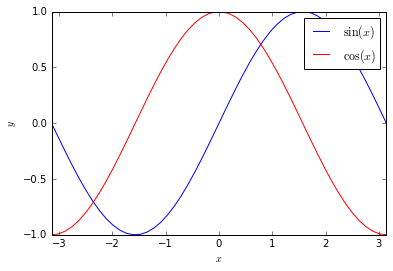

In [2]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.plot(xs, ys[0], 'b', label=r'$\sin(x)$')
plt.plot(xs, ys[1], 'r', label=r'$\cos(x)$')
plt.xlim(xs[0], xs[-1])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()
plt.show()

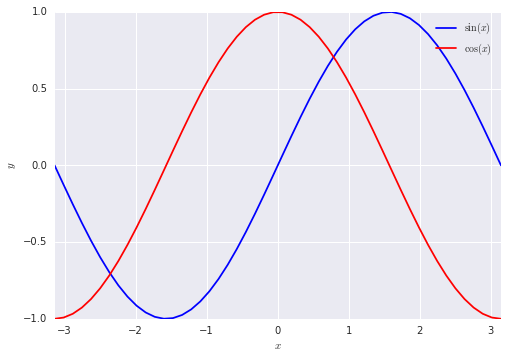

In [3]:
import seaborn 

plt.plot(xs, ys[0], 'b', label=r'$\sin(x)$')
plt.plot(xs, ys[1], 'r', label=r'$\cos(x)$')
plt.xlim(xs[0], xs[-1])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()
plt.show()

In [4]:
import bokeh.plotting as bkh
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [5]:
fig = bkh.figure()
fig.line(xs, ys[0], legend='sin(x)', line_color='blue')
fig.line(xs, ys[1], legend='cos(x)', line_color='red')
fig.xaxis.axis_label = 'x'
fig.yaxis.axis_label = 'y'
bkh.show(fig)